# 7.3. Дифференцирование (разностное преобразование)

## 1. Введение

**Дифференцирование (differencing) временного ряда** — переход к попарным разностям его соседних значений:

$$y_1,...,y_t \to y'_2,...,y'_t $$
$$y'_t=y_t-y_{t-1}$$

В данном случае мы из текущего значения вычли предыдущее. Эту операцию можно обратить, добавив к предыдущему наблюдению вычисленную разность.

`Дифференцированием` можно `стабилизировать среднее значение ряда` и `избавиться от тренда и сезонности`, тем самым **преобразовав нестационарный ряд в стационарный**.

Может применяться неоднократное дифференцирование, например для второго порядка:

$$y_1,...,y_t \to y'_2,...,y'_t \to y''_3,...,y''_t$$

На практике мы практически всегда ограничиваемся дифференцированием первого и второго порядков.

Кроме того, можно применять сезонное дифференцирование ряда — переход к попарным разностям его значений в
соседних сезонах:

$$y_1,...,y_t \to y'_{s+1},...,y'_t $$
$$y'_t=y_t-y_{t-s}$$

Сезонное и обычное дифференцирование может применяться к одному ряду в любом порядке.
Если ряд имеет выраженный сезонный профиль, рекомендуется начинать с сезонного дифференцирования — после него ряд уже может оказаться стационарным.

## 2. Данные: акции Google

Импортируем необходимые библиотеки и функции.

In [ ]:
# Импортируем библиотеки NumPy и pandas
import numpy as np
import pandas as pd

# Импортируем функции для построения графика автокорреляционной 
# функции, графика частной автокорреляционной функции
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Импортируем функции для выполнения теста Дикки — Фуллера
from statsmodels.tsa.stattools import adfuller

# Импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Загружаем временной ряд, представляющий курс акций Google в течение 200 дней подряд.

In [ ]:
# Загружаем временной ряд, представляющий курс акций Google 
# в течение 200 дней подряд
goog200 = pd.read_csv(
    './data/goog200.csv', 
    header=0, 
    index_col=0,
    parse_dates=True, 
    squeeze=True)

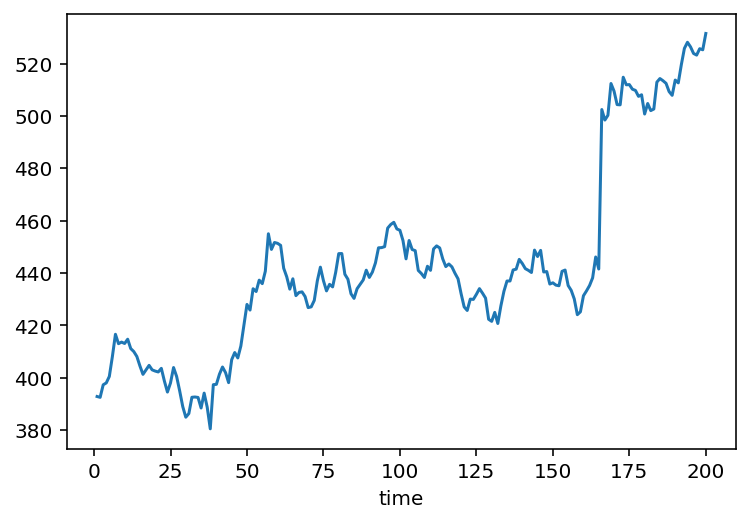

In [ ]:
# Визуализируем временной ряд, представляющий курс акций Google 
# в течение 200 дней подряд
goog200.plot();

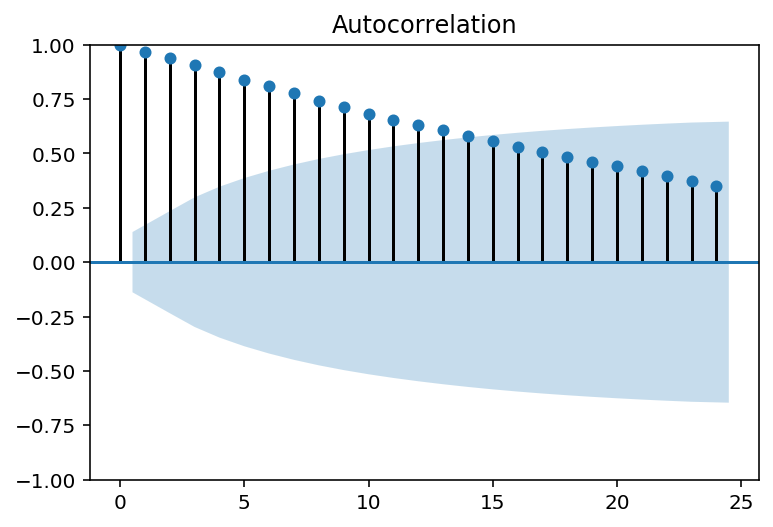

In [ ]:
# Строим график автокорреляционной функции
# для данных о курсе акций Google
plot_acf(goog200);

Здесь мы видим нестационарный временной ряд, о чём свидетельствует тренд и медленное уменьшение коэффициентов автокорреляции на графике автокорреляционной функции.

Пишем функцию, выполняющую дифференцирование.

In [ ]:
# Пишем функцию дифференцирования
def differencing(train, interval=1):
    
    diff = list()
    for i in range(interval, len(train)):
        value = train[i] - train[i - interval]
        diff.append(value)
        
    return pd.Series(diff)

С помощью этой функции вычтем из текущего значения предыдущее и, по сути, получим ежедневное изменение курса акций Google в течение 200 дней подряд.

In [ ]:
# Преобразовываем в массив NumPy и меняем тип
X = goog200.values
X = X.astype('float32')

# Выполняем преобразование данных
days = 1
goog200_diff = differencing(X, days)
goog200_diff.index = goog200.index[days:]
goog200_diff = goog200_diff.rename_axis('time')

После дифференцирования визуализируем временной ряд и строим график автокорреляционной функции.

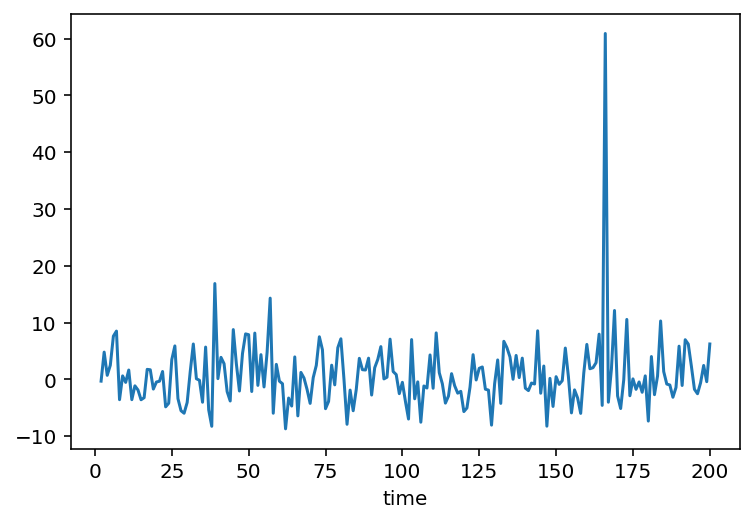

In [ ]:
# Визуализируем временной ряд, представляющий ежедневное изменение 
# курса акций Google в течение 200 дней подряд
goog200_diff.plot();

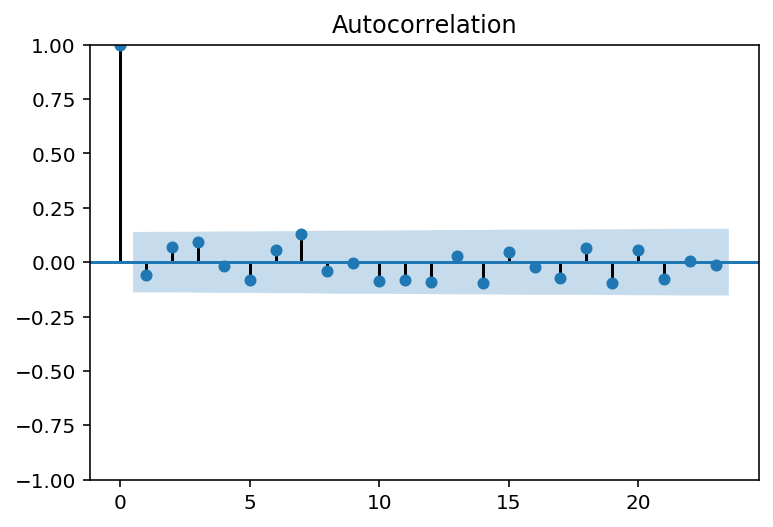

In [ ]:
# Строим график автокорреляционной функции для
# данных о ежедневном изменении курса акций Google
plot_acf(goog200_diff);

Здесь мы видим стационарный временной ряд, тренд отсутствует, и у нас очень низкие коэффициенты автокорреляции даже для небольших значений лагов на графике автокорреляционной функции.

## 3. Данные об авиаперевозках

Вернёмся к данным об авиаперевозках. 

К текущему моменту мы уже получили некоторые доказательства того, что наш временной ряд, содержащий данные об авиаперевозках, является нестационарным. 

Применим преобразование с помощью разностей, чтобы удалить тренд и сезонность и тем самым превратить наш нестационарный временной ряд в стационарный. Вычтем из текущих значений временного ряда значения соответствующих месяцев, но за предыдущий год, и тем самым получим новый ряд. Перед преобразованием взглянем на последние 24 значения исходного временного ряда.

In [ ]:
# Загружаем данные об авиаперевозках
air_passengers = pd.read_csv(
    './data/AirPassengers.csv', 
    header=0, 
    index_col=0, 
    parse_dates=True, 
    squeeze=True)

In [ ]:
# Взглянем на последние 24 значения исходного 
# временного ряда по авиаперевозкам
air_passengers.tail(24)

Month
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

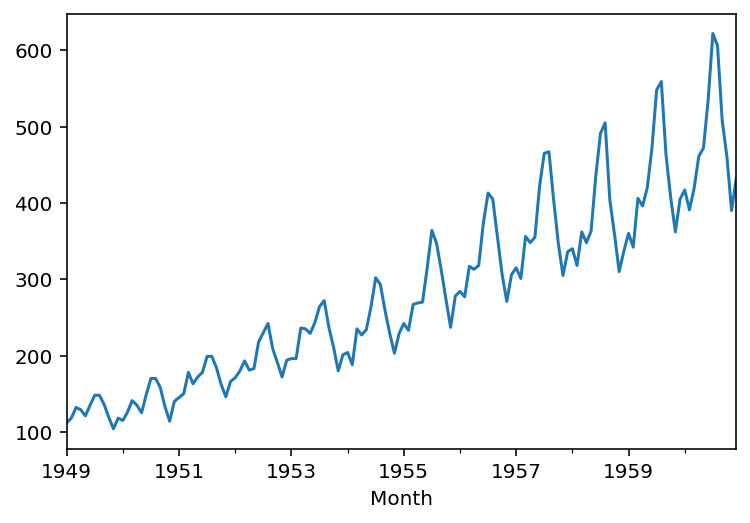

In [ ]:
# Визуализируем временной ряд
air_passengers.plot();

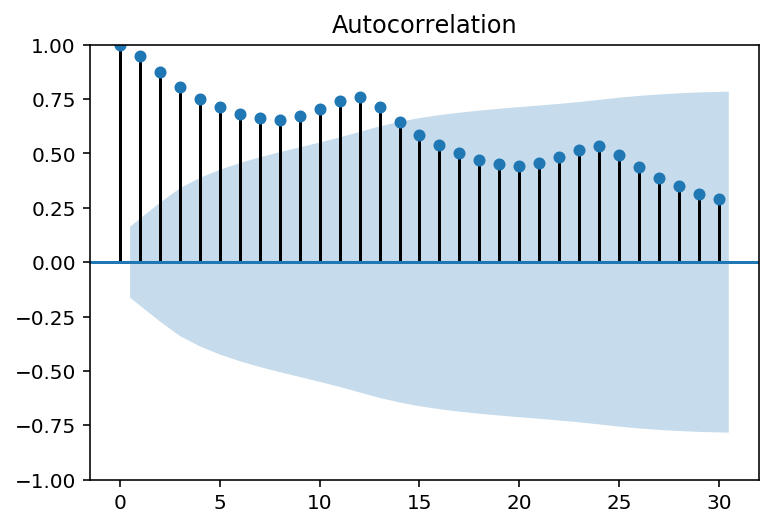

In [ ]:
# Строим график автокорреляционной функции
# для данных об авиаперевозках
k = int(np.sqrt(len(air_passengers)))
plot_acf(air_passengers, lags=30);

Теперь применяем функцию дифференцирования и печатаем последние 24 значения преобразованного временного ряда.

In [ ]:
# Преобразовываем в массив NumPy и меняем тип
X = air_passengers.values
X = X.astype('float32')

# Выполняем преобразование данных
months_in_year = 12
air_passengers_diff = differencing(X, months_in_year)
air_passengers_diff.index = air_passengers.index[months_in_year:]
air_passengers_diff = air_passengers_diff.rename_axis('Months')

# Взглянем на последние 24 значения преобразованного 
# временного ряда по авиаперевозкам
air_passengers_diff.tail(24)

Months
1959-01-01    20.0
1959-02-01    24.0
1959-03-01    44.0
1959-04-01    48.0
1959-05-01    57.0
1959-06-01    37.0
1959-07-01    57.0
1959-08-01    54.0
1959-09-01    59.0
1959-10-01    48.0
1959-11-01    52.0
1959-12-01    68.0
1960-01-01    57.0
1960-02-01    49.0
1960-03-01    13.0
1960-04-01    65.0
1960-05-01    52.0
1960-06-01    63.0
1960-07-01    74.0
1960-08-01    47.0
1960-09-01    45.0
1960-10-01    54.0
1960-11-01    28.0
1960-12-01    27.0
dtype: float32

Давайте визуализируем преобразованный временной ряд.

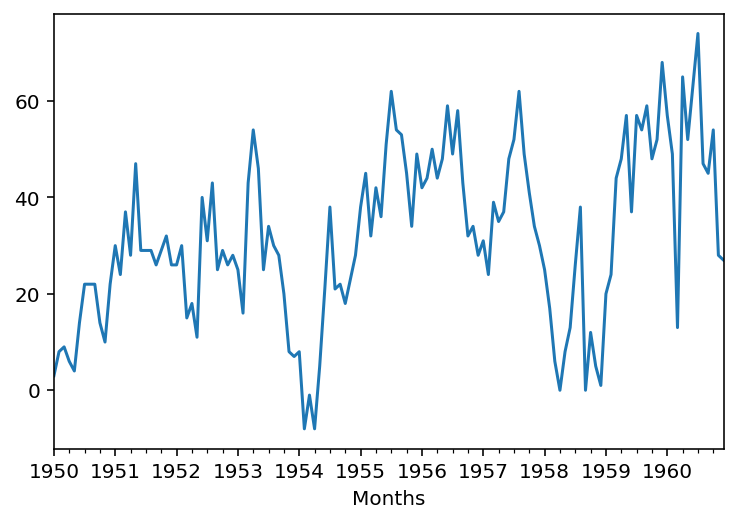

In [ ]:
# Визуализируем временной ряд по авиаперевозкам 
# после дифференцирования
air_passengers_diff.plot();

В данных тяжело разглядеть какой-то тренд или сезонность. Теперь построим график автокорреляционной функции для преобразованного временного ряда.

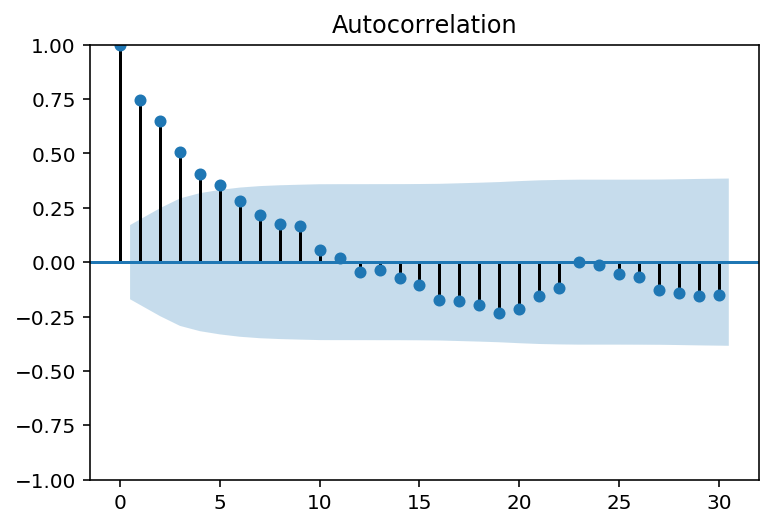

In [ ]:
# Строим график автокорреляционной функции
# для преобразованных данных об авиаперевозках
k = int(np.sqrt(len(air_passengers_diff)))
plot_acf(air_passengers_diff, lags=30);

Вспоминаем, что для **стационарного временного ряда**, независимо от значений в первом лаге, график автокорреляционной функции быстро затухает после несколько первых значений.

Применяем расширенный тест Дикки — Фуллера.

In [ ]:
# Записываем результат теста
result = adfuller(air_passengers_diff)
# Печатаем результаты теста
print("Статистика ADF: %f" % result[0])
print("p-значение: %f" % result[1])
print("Критические значения:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

Статистика ADF: -3.383021
p-значение: 0.011551
Критические значения:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Видим, что p-значение меньше 0,05. Мы можем отклонить нулевую гипотезу о том, что временной ряд является нестационарным.